In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LETS RECHECK THE IRIS DATASET TO SEE IF THE PERCEPTRON CLASSIFIER ABLE TO CLASSIFY THE FLOWERS

In [2]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y4 = iris.iloc[0:100, 4].values
y4 = np.where(y4 == 'Iris-setosa', -1, 1)

# sepal length and petal length
X4 = iris.iloc[0:100, [0,2]].values

Weights: [-0.04  -0.068  0.182]


C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


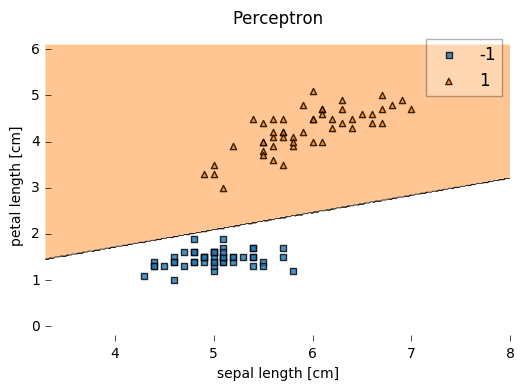

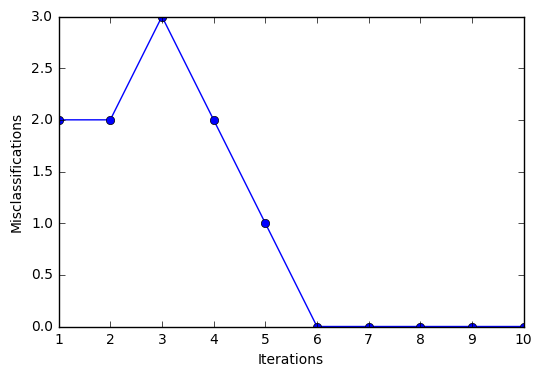

In [3]:
from mlxtend.plotting import plot_decision_regions
from perceptron import *   # calling our implemented classifier

scp = Simple_Classifier_Perceptron(num_iterations=10, eta=0.01)

scp.fit(X4, y4)
print('Weights: %s' % scp.w_)
plot_decision_regions(X4, y4, clf=scp)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(scp.errors_)+1), scp.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [4]:
print('Total number of misclassifications: %d of 100' % (y4 != scp.predict(X4)).sum())

Total number of misclassifications: 0 of 100


''
Glass Identification Data 

Description: Predict the glass type from chemical properties.

Type: Classification
Dimensions: 214 instances, 10 attributes
Inputs: Numeric
Output: Categorical, 7 class labels

'''
'''
Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
'''

In [2]:
#Preprocessing Glass data set
#To test our perceptron classifier implementation.

try:
    glass_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)
    glass_data.columns = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
    # print the dimensions
    print("Number of Samples: {}".format(glass_data.shape[0]))
    print("Number of Features: {}".format(glass_data.shape[1]))
except:
    print("Dataset could not be loaded. Check the URL source")

Number of Samples: 214
Number of Features: 11


In [3]:
glass_data.head(2)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [4]:
glass_data.tail(2)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
212,213,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


In [5]:
# check the class distribution
glass_data['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

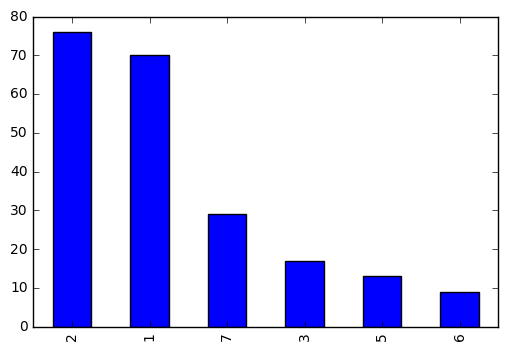

In [6]:
# plot bar
glass_data['Type of glass'].value_counts().plot.bar()

In [7]:
# check if any missing values in the dataset

# user-defined fuctn
def is_missing(x):
    return sum(x.isnull())

In [8]:
# apply the function on the dataset

# applying per column
print("Missing values per column")
print(glass_data.apply(is_missing, axis=0)) # axis = 0 defines that function is to be applied on each column

# appling per row
print("\nMissing values per row")
print(glass_data.apply(is_missing, axis=1).head()) # axis = 1 defines that function is to be applied on each row

Missing values per column
Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

Missing values per row
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [9]:
# check the correlation of the dataset
glass_data.corr()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [10]:
# see the corrrelation > 0.98 & we choose the two such variable for scatter plot

glass_data.corr() > 0.98

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,True,False,False,False,False,False,False,False,False,False,False
RI,False,True,False,False,False,False,False,False,False,False,False
Na,False,False,True,False,False,False,False,False,False,False,False
Mg,False,False,False,True,False,False,False,False,False,False,False
Al,False,False,False,False,True,False,False,False,False,False,False
Si,False,False,False,False,False,True,False,False,False,False,False
K,False,False,False,False,False,False,True,False,False,False,False
Ca,False,False,False,False,False,False,False,True,False,False,False
Ba,False,False,False,False,False,False,False,False,True,False,False
Fe,False,False,False,False,False,False,False,False,False,True,False


In [11]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id number        214 non-null int64
RI               214 non-null float64
Na               214 non-null float64
Mg               214 non-null float64
Al               214 non-null float64
Si               214 non-null float64
K                214 non-null float64
Ca               214 non-null float64
Ba               214 non-null float64
Fe               214 non-null float64
Type of glass    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [12]:
# since we observe that class 2 & class 1 have the most instances we only keep those for simplified understanding

# make a copy of the data
glass_data_two_classes = glass_data.copy()

In [13]:
glass_data_two_classes.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [14]:
# rename columns
glass_data_two_classes.columns = ['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass']

In [15]:
glass_data_two_classes.columns

Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [16]:
glass_data_two_classes.head(3)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [17]:
glass_data_two_classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id_number        214 non-null int64
RI               214 non-null float64
Na               214 non-null float64
Mg               214 non-null float64
Al               214 non-null float64
Si               214 non-null float64
K                214 non-null float64
Ca               214 non-null float64
Ba               214 non-null float64
Fe               214 non-null float64
Type_of_glass    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [18]:
glass_data_two_classes = glass_data_two_classes[(glass_data_two_classes.Type_of_glass==1) | (glass_data_two_classes.Type_of_glass==2)]
glass_data_two_classes_distribution = glass_data_two_classes.groupby('Type_of_glass').apply(lambda x: len(x))
glass_data_two_classes_distribution

Type_of_glass
1    70
2    76
dtype: int64

In [19]:
glass_data_two_classes.shape

(146, 11)

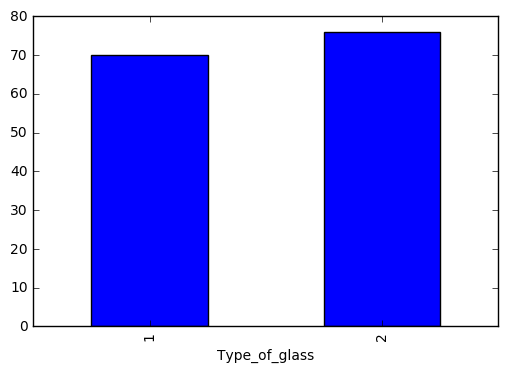

In [20]:
glass_data_two_classes_distribution.plot.bar()

In [21]:
glass_data_two_classes.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


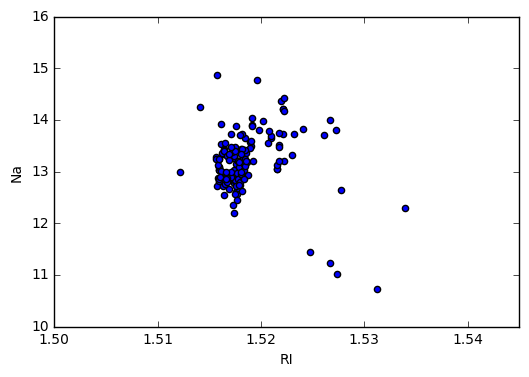

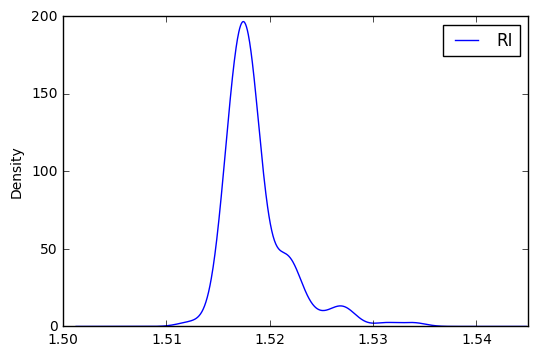

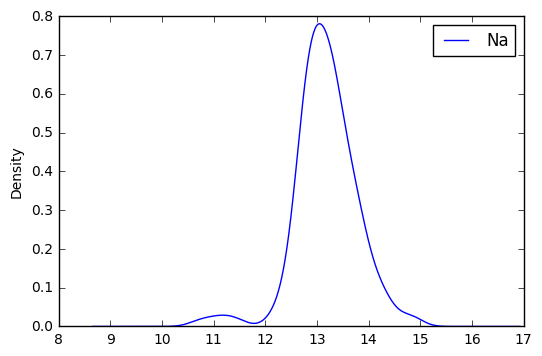

In [22]:
import seaborn as sns
#plot
glass_data_two_classes.plot(kind='scatter', x='RI', y='Na')
glass_data_two_classes.plot(kind='kde', y='RI')
glass_data_two_classes.plot(kind='kde', y='Na')

In [23]:
# We will only use the two features (RI & Na) for visualization purposes.
X, y = glass_data_two_classes.iloc[:, 1:3].values, glass_data_two_classes.iloc[:, -1].values

In [24]:
X

array([[ 1.52101, 13.64   ],
       [ 1.51761, 13.89   ],
       [ 1.51618, 13.53   ],
       [ 1.51766, 13.21   ],
       [ 1.51742, 13.27   ],
       [ 1.51596, 12.79   ],
       [ 1.51743, 13.3    ],
       [ 1.51756, 13.15   ],
       [ 1.51918, 14.04   ],
       [ 1.51755, 13.     ],
       [ 1.51571, 12.72   ],
       [ 1.51763, 12.8    ],
       [ 1.51589, 12.88   ],
       [ 1.51748, 12.86   ],
       [ 1.51763, 12.61   ],
       [ 1.51761, 12.81   ],
       [ 1.51784, 12.68   ],
       [ 1.52196, 14.36   ],
       [ 1.51911, 13.9    ],
       [ 1.51735, 13.02   ],
       [ 1.5175 , 12.82   ],
       [ 1.51966, 14.77   ],
       [ 1.51736, 12.78   ],
       [ 1.51751, 12.81   ],
       [ 1.5172 , 13.38   ],
       [ 1.51764, 12.98   ],
       [ 1.51793, 13.21   ],
       [ 1.51721, 12.87   ],
       [ 1.51768, 12.56   ],
       [ 1.51784, 13.08   ],
       [ 1.51768, 12.65   ],
       [ 1.51747, 12.84   ],
       [ 1.51775, 12.85   ],
       [ 1.51753, 12.57   ],
       [ 1.517

In [25]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Weights: [ 0.       -0.000527  0.122   ]


C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


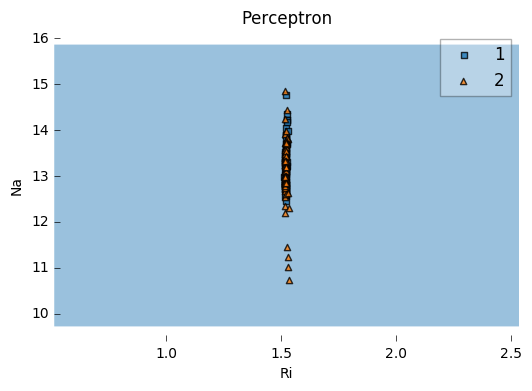

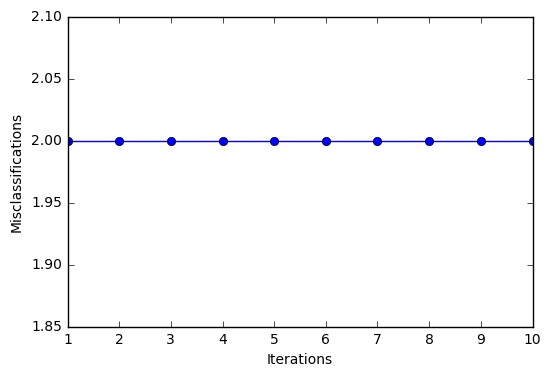

In [26]:
from mlxtend.plotting import plot_decision_regions
from perceptron import *   # calling our implemented classifier

scp = Simple_Classifier_Perceptron(eta=0.01, num_iterations=10)

scp.fit(X, y)
print('Weights: %s' % scp.w_)
plot_decision_regions(X, y, clf=scp)
plt.title('Perceptron')
plt.xlabel('Ri')
plt.ylabel('Na')
plt.show()

plt.plot(range(1, len(scp.errors_)+1), scp.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [27]:
print('Total number of misclassifications: %d of 146' % (y != scp.predict(X)).sum())

Total number of misclassifications: 70 of 146


In [28]:
# We will only use the next two features (Mg & AI) for visualization purposes.
X1, y1 = glass_data_two_classes.iloc[:, 3:5].values, glass_data_two_classes.iloc[:, -1].values

In [29]:
X1

array([[4.49, 1.1 ],
       [3.6 , 1.36],
       [3.55, 1.54],
       [3.69, 1.29],
       [3.62, 1.24],
       [3.61, 1.62],
       [3.6 , 1.14],
       [3.61, 1.05],
       [3.58, 1.37],
       [3.6 , 1.36],
       [3.46, 1.56],
       [3.66, 1.27],
       [3.43, 1.4 ],
       [3.56, 1.27],
       [3.59, 1.31],
       [3.54, 1.23],
       [3.67, 1.16],
       [3.85, 0.89],
       [3.73, 1.18],
       [3.54, 1.69],
       [3.55, 1.49],
       [3.75, 0.29],
       [3.62, 1.29],
       [3.57, 1.35],
       [3.5 , 1.15],
       [3.54, 1.21],
       [3.48, 1.41],
       [3.48, 1.33],
       [3.52, 1.43],
       [3.49, 1.28],
       [3.56, 1.3 ],
       [3.5 , 1.14],
       [3.48, 1.23],
       [3.47, 1.38],
       [3.54, 1.34],
       [3.45, 1.21],
       [3.53, 1.32],
       [3.48, 1.35],
       [3.82, 0.47],
       [3.82, 0.47],
       [3.5 , 1.12],
       [3.42, 1.2 ],
       [3.39, 1.33],
       [3.84, 0.72],
       [3.43, 1.19],
       [3.48, 1.35],
       [3.37, 1.18],
       [3.7 ,

Weights: [ 0.02   -0.0118  0.0833]


C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


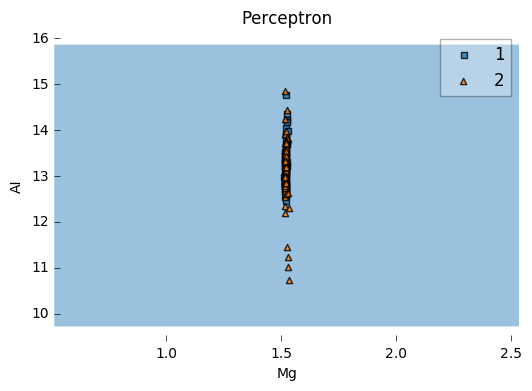

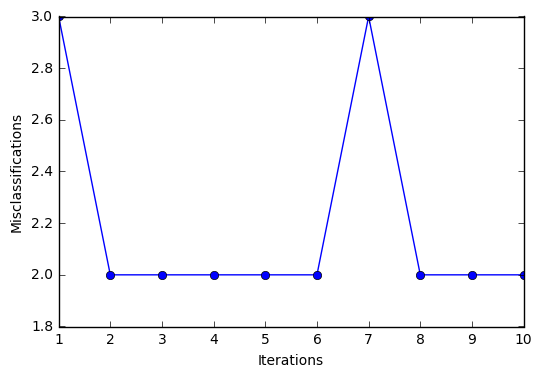

In [30]:
scp = Simple_Classifier_Perceptron(eta=0.01, num_iterations=10)

scp.fit(X1, y1)
print('Weights: %s' % scp.w_)
plot_decision_regions(X, y, clf=scp)
plt.title('Perceptron')
plt.xlabel('Mg')
plt.ylabel('AI')
plt.show()

plt.plot(range(1, len(scp.errors_)+1), scp.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [31]:
print('Total number of misclassifications: %d of 146' % (y1 != scp.predict(X1)).sum())

Total number of misclassifications: 69 of 146


In [32]:
# We will only use the two features (K, Ca) for visualization purposes.
X2, y2 = glass_data_two_classes.iloc[:, 6:8].values, glass_data_two_classes.iloc[:, -1].values

In [33]:
X2

array([[ 0.06,  8.75],
       [ 0.48,  7.83],
       [ 0.39,  7.78],
       [ 0.57,  8.22],
       [ 0.55,  8.07],
       [ 0.64,  8.07],
       [ 0.58,  8.17],
       [ 0.57,  8.24],
       [ 0.56,  8.3 ],
       [ 0.57,  8.4 ],
       [ 0.67,  8.09],
       [ 0.6 ,  8.56],
       [ 0.69,  8.05],
       [ 0.54,  8.38],
       [ 0.58,  8.5 ],
       [ 0.58,  8.39],
       [ 0.61,  8.7 ],
       [ 0.15,  9.15],
       [ 0.06,  8.89],
       [ 0.54,  8.44],
       [ 0.54,  8.52],
       [ 0.03,  9.  ],
       [ 0.59,  8.7 ],
       [ 0.62,  8.59],
       [ 0.5 ,  8.43],
       [ 0.65,  8.53],
       [ 0.59,  8.43],
       [ 0.56,  8.43],
       [ 0.57,  8.54],
       [ 0.6 ,  8.49],
       [ 0.61,  8.69],
       [ 0.56,  8.55],
       [ 0.61,  8.56],
       [ 0.6 ,  8.55],
       [ 0.57,  8.75],
       [ 0.56,  8.57],
       [ 0.51,  8.78],
       [ 0.64,  8.68],
       [ 0.11,  9.57],
       [ 0.11,  9.57],
       [ 0.64,  8.77],
       [ 0.59,  8.64],
       [ 0.59,  8.59],
       [ 0.

In [34]:
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Weights: [0.02   0.0208 0.0274]


C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


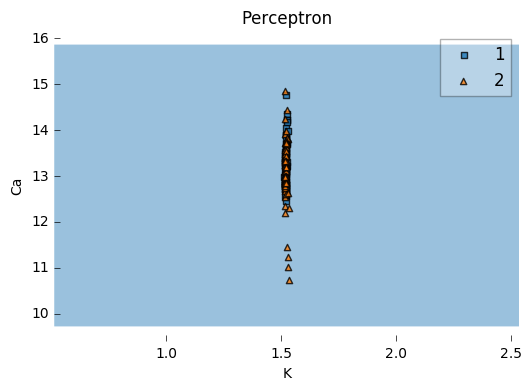

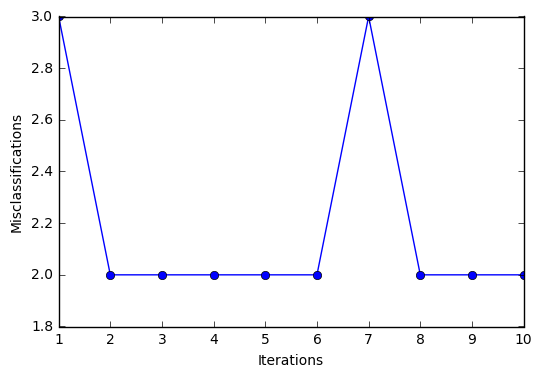

In [35]:
scp = Simple_Classifier_Perceptron(eta=0.01, num_iterations=10)

scp.fit(X2, y2)
print('Weights: %s' % scp.w_)
plot_decision_regions(X, y, clf=scp)
plt.title('Perceptron')
plt.xlabel('K')
plt.ylabel('Ca')
plt.show()

plt.plot(range(1, len(scp.errors_)+1), scp.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [36]:
print('Total number of misclassifications: %d of 146' % (y2 != scp.predict(X2)).sum())

Total number of misclassifications: 70 of 146


In [37]:
# We will only use the two features (K, Ca) for visualization purposes.
X3, y3 = glass_data_two_classes.iloc[:, 5:7].values, glass_data_two_classes.iloc[:, -1].values

In [38]:
X3

array([[7.178e+01, 6.000e-02],
       [7.273e+01, 4.800e-01],
       [7.299e+01, 3.900e-01],
       [7.261e+01, 5.700e-01],
       [7.308e+01, 5.500e-01],
       [7.297e+01, 6.400e-01],
       [7.309e+01, 5.800e-01],
       [7.324e+01, 5.700e-01],
       [7.208e+01, 5.600e-01],
       [7.299e+01, 5.700e-01],
       [7.320e+01, 6.700e-01],
       [7.301e+01, 6.000e-01],
       [7.328e+01, 6.900e-01],
       [7.321e+01, 5.400e-01],
       [7.329e+01, 5.800e-01],
       [7.324e+01, 5.800e-01],
       [7.311e+01, 6.100e-01],
       [7.136e+01, 1.500e-01],
       [7.212e+01, 6.000e-02],
       [7.273e+01, 5.400e-01],
       [7.275e+01, 5.400e-01],
       [7.202e+01, 3.000e-02],
       [7.279e+01, 5.900e-01],
       [7.302e+01, 6.200e-01],
       [7.285e+01, 5.000e-01],
       [7.300e+01, 6.500e-01],
       [7.264e+01, 5.900e-01],
       [7.304e+01, 5.600e-01],
       [7.315e+01, 5.700e-01],
       [7.286e+01, 6.000e-01],
       [7.308e+01, 6.100e-01],
       [7.327e+01, 5.600e-01],
       [

In [39]:
y3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

Weights: [0.    0.018 0.02 ]


C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\arun\Anaconda3\lib\site-packages\numpy\ma\core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


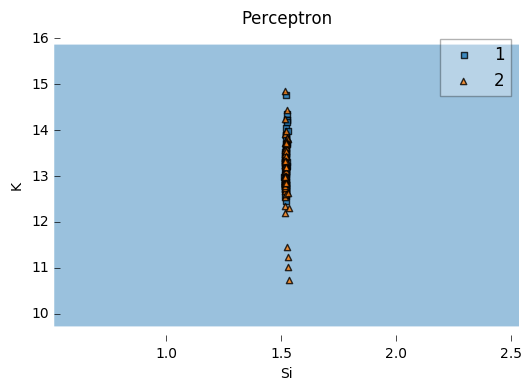

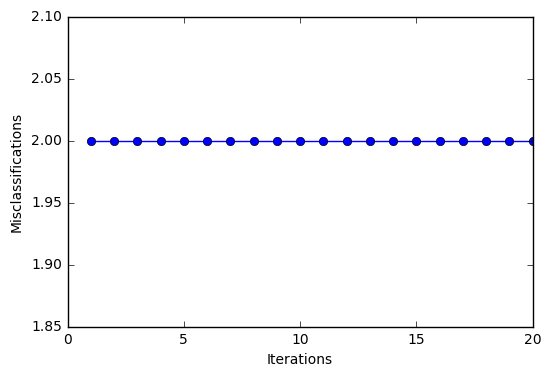

In [40]:
scp = Simple_Classifier_Perceptron(eta=0.01, num_iterations=20)

scp.fit(X3, y3)
print('Weights: %s' % scp.w_)
plot_decision_regions(X, y, clf=scp)
plt.title('Perceptron')
plt.xlabel('Si')
plt.ylabel('K')
plt.show()

plt.plot(range(1, len(scp.errors_)+1), scp.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [41]:
print('Total number of misclassifications: %d of 146' % (y3 != scp.predict(X3)).sum())

Total number of misclassifications: 70 of 146
